# Project Master's Thesis: Forest Fire on Socioeconomic Outcomes in Indonesia
## Author: Lokesh Pandey
### Date: 05.02.2025

## Forest Fire Data Exploration in Indonesia from 2000 till 2018 in Python using ESRI .shp files for all fires 

In [1]:
# Libraries
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [2]:
# Move two steps back and then enter 'data/esri'
datadr = os.chdir("../../Data/Extracted_yearly_IND")

In [3]:
# Load final shape files for fires in Indonesia
Indo = gpd.read_file("combined_indonesia_all_years.shp") 

In [4]:
# Check out the data
Indo.head()

# Dimension --> 671360 instances of fire in Indonesia in the above time frame
Indo.shape

(671360, 8)

From 2000 till 2018 there are 671360 fires. Since processing all these fires would be quite data intensive, maybe analyze top 10 to 20 biggest fires in Indonesia, model their smoke plumes and analyze the socio economic impacts. 

Let's overlay the fires on Indonesia's boundary.

For the analysis purpose, timeline of 2005 to 2015 is set. Filter observation within the specified time frame.

In [6]:
# Load Indonesia's shape files from GADM 4.1
indo_shp_dir = os.chdir("../../Data/gadm41_IDN_shp")

Indo_shp_0 = gpd.read_file("gadm41_IDN_0.shp") # National boundary
Indo_shp_1 = gpd.read_file("gadm41_IDN_1.shp") # Provincial boundary

/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_25429/2901671236.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper right')
/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_25429/2901671236.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


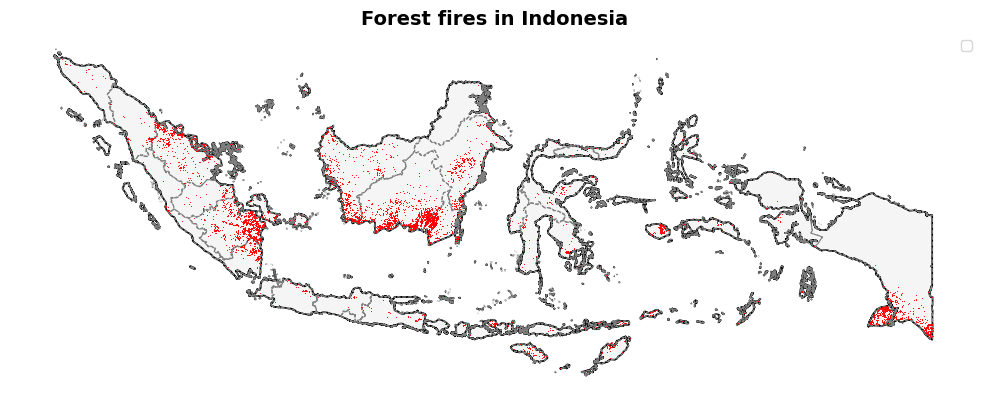

In [7]:
# Overlay the fire data on country's level 0 and 1 boundary
# Create plot
fig, ax = plt.subplots(figsize=(12.5, 12.5))

# Plot Indonesia country boundary (Level 0)
Indo_shp_0.plot(ax=ax, edgecolor='black', facecolor='whitesmoke', linewidth=1.2, label="National Boundary")

# Plot Level 1 boundaries (provinces)
Indo_shp_1.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.8, linestyle='--', label="Provincial Boundary")

# Plot fire locations
Indo.plot(ax=ax, color='red', markersize=10, alpha=0.7, label="Fire Locations")

# Customize appearance
ax.set_title("Forest fires in Indonesia", fontsize=14, fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.legend(loc='upper right')

# Show plot
plt.show()


/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_2808/3357475954.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')
/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_2808/3357475954.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')


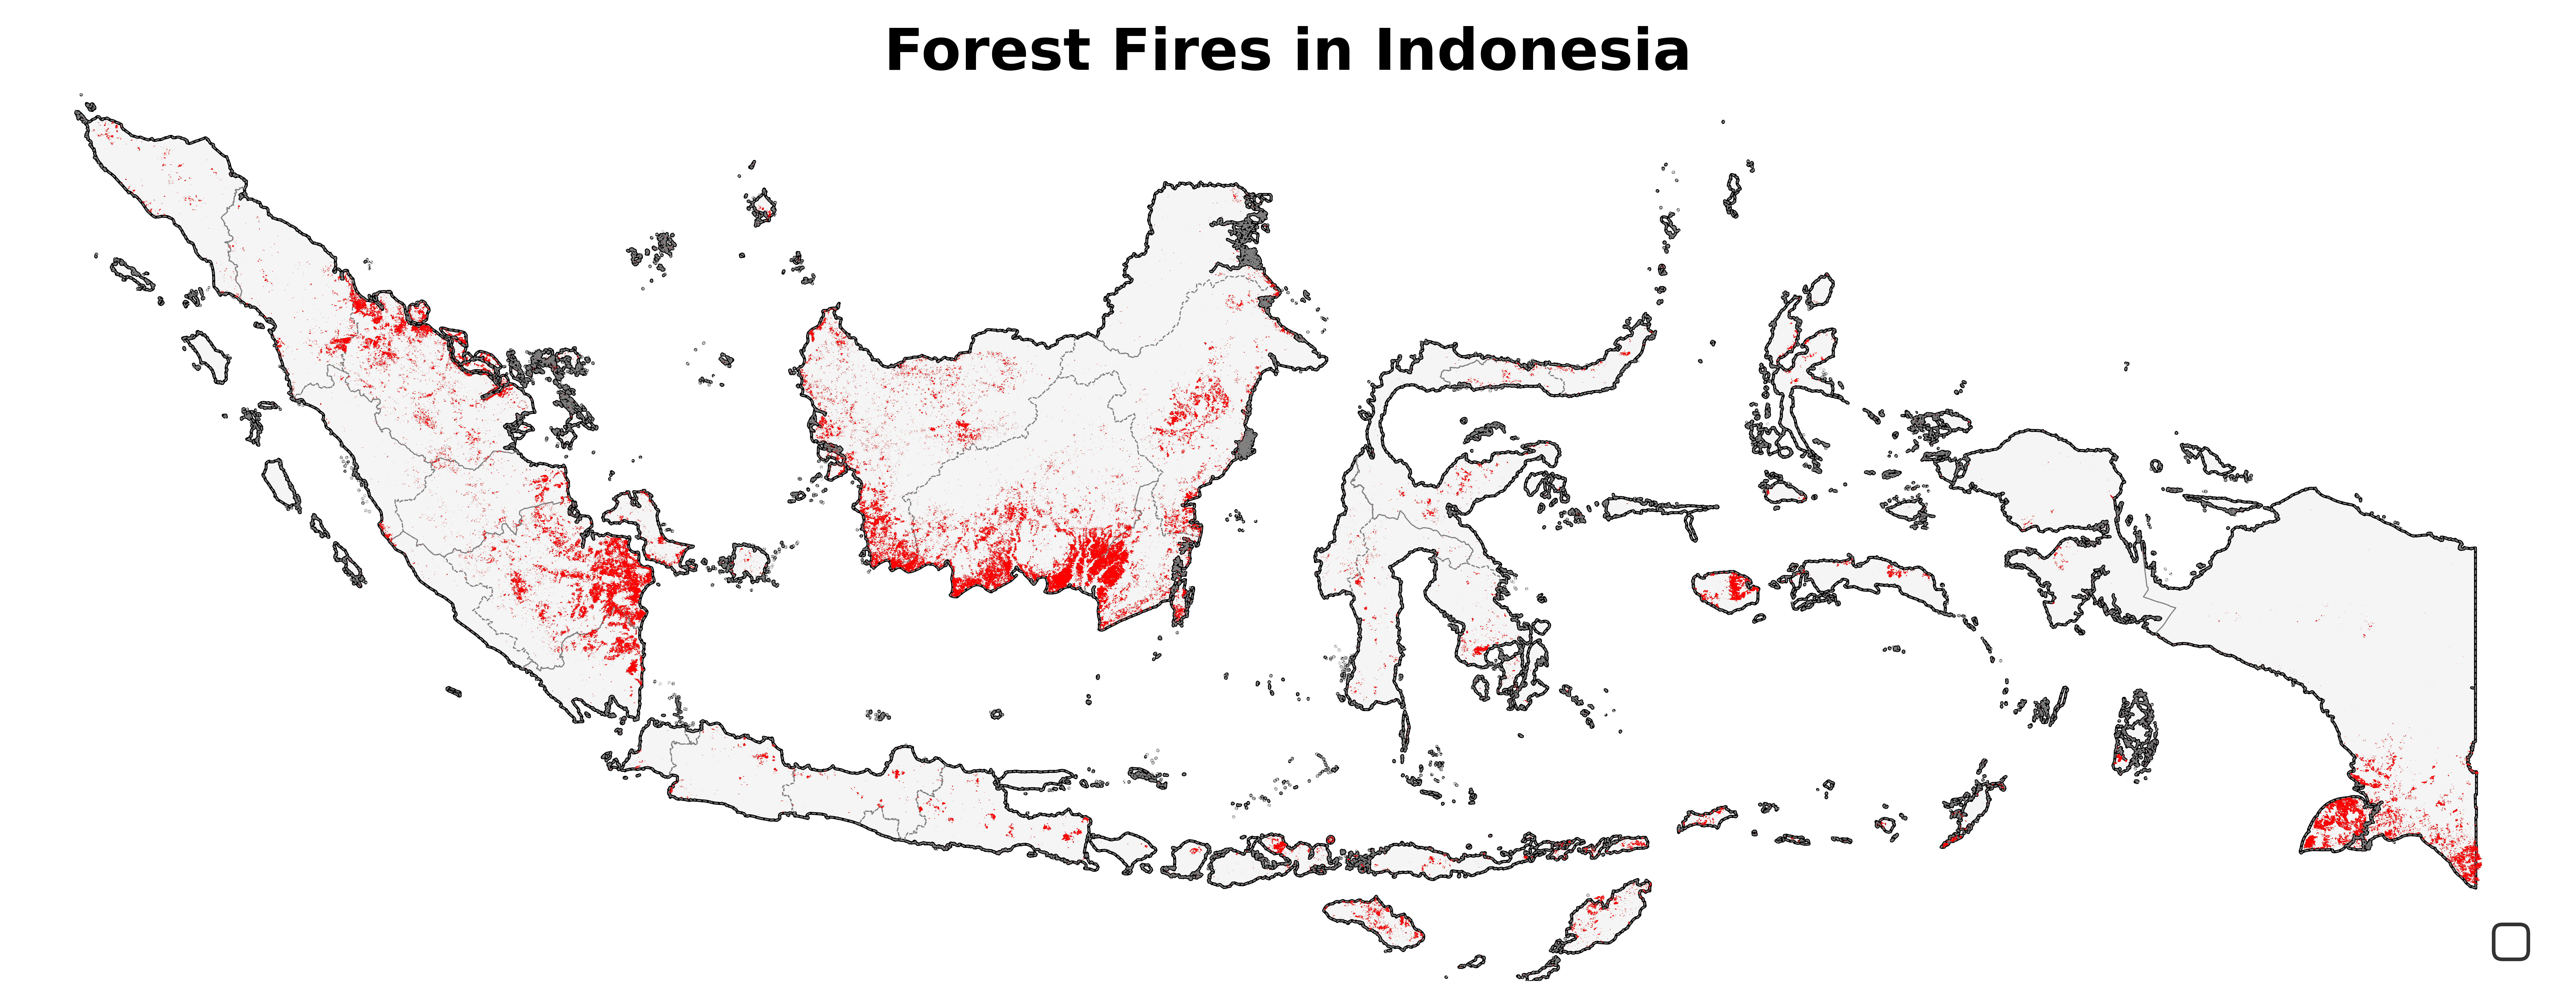

In [ ]:
# Second attempt at making it prettier
# Create plot
fig, ax = plt.subplots(figsize=(12.5, 12.5), dpi=1000)  # Increased DPI for better quality

# Plot Indonesia country boundary (Level 0)
Indo_shp_0.plot(ax=ax, edgecolor='black', facecolor='whitesmoke', linewidth=0.8, label="National Boundary")

# Plot Level 1 boundaries (provinces)
Indo_shp_1.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.3, linestyle='--', label="Provincial Boundary")

# Plot fire locations
Indo.plot(ax=ax, color='red', markersize=15, alpha=1, label="Fire Locations")

# Customize appearance
ax.set_title("Forest fires in Indonesia", fontsize=16, fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_xlim(Indo_shp_0.total_bounds[0] * 0.99, Indo_shp_0.total_bounds[2] * 1.01)  # Zoom in slightly
ax.set_ylim(Indo_shp_0.total_bounds[1] * 0.99, Indo_shp_0.total_bounds[3] * 1.01)
ax.legend(loc='lower right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Show plot
plt.show()


/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_2808/1773070603.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_2808/1773070603.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


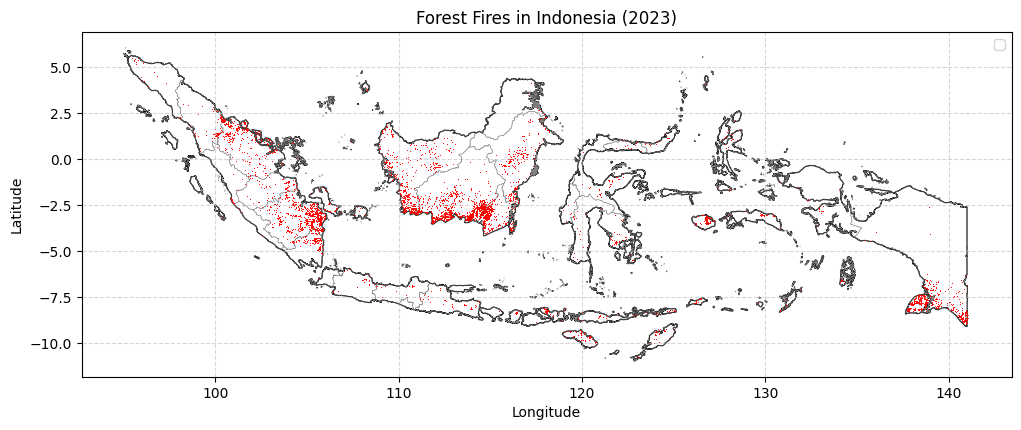

In [ ]:
# Another approach 
# Plot everything
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Level 0 (national boundary)
Indo_shp_0.plot(ax=ax, color="none", edgecolor="black", linewidth=0.8, label="National Boundary")

# Plot Level 1 (province boundaries)
Indo_shp_1.plot(ax=ax, color="none", edgecolor="gray", linewidth=0.3, label="Province Boundaries")

# Plot forest fires (customize color/size)
Indo.plot(ax=ax, color="red", markersize=5, alpha=0.7, label="Forest fires")

# Customize the plot
plt.title("Forest fires in Indonesia (2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Save or show the map
plt.savefig("indonesia_forest_fires_map.png", dpi=300, bbox_inches="tight")
plt.show()

Let's explore the the length and extent of fire damage. 

In [8]:
Indo.head()


IDate        Type        Id      FDate  index_righ GID_0    COUNTRY  \
0 2012-12-15  ActiveArea  15061521 2012-12-15           0   IDN  Indonesia   
1 2012-12-16  ActiveArea  15061521 2012-12-16           0   IDN  Indonesia   
2 2012-12-15   FinalArea  15061521 2012-12-16           0   IDN  Indonesia   
3 2012-12-16  ActiveArea  15061522 2012-12-16           0   IDN  Indonesia   
4 2012-12-16   FinalArea  15061522 2012-12-16           0   IDN  Indonesia   

                                            geometry  
0  POLYGON ((130.37695 -0.25781, 130.38135 -0.257...  
1  POLYGON ((130.37695 -0.26221, 130.38135 -0.262...  
2  POLYGON ((130.38135 -0.26221, 130.38135 -0.266...  
3  POLYGON ((130.46045 -0.25781, 130.46484 -0.257...  
4  POLYGON ((130.46045 -0.25781, 130.46484 -0.257...

In [13]:
Indo.describe()
Indo["Type"].value_counts()

Type
ActiveArea    508485
FinalArea     162875
Name: count, dtype: int64

Calculate Area


In [31]:
# Ensure the CRS is projected for accurate area calculation
if Indo_proj.crs.is_geographic:
    Indo_proj = Indo.to_crs(epsg=3857)

# Convert date columns to datetime format
Indo_proj["IDate"] = pd.to_datetime(Indo_proj["IDate"])
Indo_proj["FDate"] = pd.to_datetime(Indo_proj["FDate"])

# Filter data based only on IDate between 2005-01-01 and 2015-12-31
Indo_proj_filtered = Indo_proj[(Indo_proj["IDate"] >= "2005-01-01") & (Indo_proj["IDate"] <= "2015-12-31")]

# Calculate area in whole numbers
Indo_proj_filtered["area"] = Indo_proj_filtered.geometry.area.round(0).astype(int)

# Get the top 20 observations with the highest area
top_20_fires = Indo_proj_filtered.nlargest(20, "area")

# Convert back to original CRS
top_20_fires = top_20_fires.to_crs(Indo_proj.crs)

# Calculate fire duration in days
top_20_fires["duration_days"] = (top_20_fires["FDate"] - top_20_fires["IDate"]).dt.days

# Save the top 20 filtered dataset to a shapefile
top_20_fires.to_file("Filtered_Top_20_Fires_2005_2015.shp")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_2808/494684657.py:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  top_20_fires.to_file("Filtered_Top_20_Fires_2005_2015.shp")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field IDate create as date field, though DateTime requested.
  ogr_write(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field FDate creat

In [32]:
top_20_fires

IDate       Type        Id      FDate  index_righ GID_0  \
641207 2009-08-18  FinalArea  11011475 2009-10-08           0   IDN   
109209 2006-08-27  FinalArea   7111864 2006-11-06           0   IDN   
337790 2015-10-01  FinalArea  18423948 2015-11-12           0   IDN   
110702 2006-09-17  FinalArea   7255923 2006-10-29           0   IDN   
111724 2006-09-03  FinalArea   7256024 2006-10-25           0   IDN   
342587 2015-08-02  FinalArea  18173503 2015-09-26           0   IDN   
322445 2015-08-24  FinalArea  18173867 2015-10-29           0   IDN   
324705 2015-09-12  FinalArea  18310437 2015-11-08           0   IDN   
78146  2006-09-10  FinalArea   7255586 2006-10-14           0   IDN   
444584 2014-09-12  FinalArea  17092519 2014-11-06           0   IDN   
2007   2013-06-09  FinalArea  15581576 2013-07-09           0   IDN   
468723 2015-12-13  FinalArea  18625221 2016-01-12           0   IDN   
81848  2006-09-09  FinalArea   7256845 2006-10-11           0   IDN   
114325 2006-09-16  FinalArea   7258177 2006-11-03           0   IDN   
73852  2006-08-16  FinalArea   7111675 2006-10-12           0   IDN   
642730 2009-08-16  FinalArea  11012093 2009-10-03           0   IDN   
427970 2014-09-09  FinalArea  17093973 2014-10-09           0   IDN   
155791 2012-09-08  FinalArea  14780984 2012-10-10           0   IDN   
115521 2006-09-11  FinalArea   7258361 2006-10-28           0   IDN   
112502 2006-09-06  FinalArea   7256156 2006-10-26           0   IDN   

          COUNTRY                                           geometry  \
641207  Indonesia  MULTIPOLYGON (((12743581.356 -345378.67, 12744...   
109209  Indonesia  MULTIPOLYGON (((12525399.502 -363996.913, 1252...   
337790  Indonesia  MULTIPOLYGON (((15429761.979 -878755.739, 1543...   
110702  Indonesia  MULTIPOLYGON (((12348310.195 -334601.041, 1234...   
111724  Indonesia  MULTIPOLYGON (((12761681.644 -339989.734, 1276...   
342587  Indonesia  MULTIPOLYGON (((12689769.688 -362036.954, 1269...   
322445  Indonesia  MULTIPOLYGON (((12464249.88 -375757.389, 12464...   
324705  Indonesia  MULTIPOLYGON (((11762741.409 -404674.069, 1176...   
78146   Indonesia  MULTIPOLYGON (((12807666.16 -323334.54, 128081...   
444584  Indonesia  MULTIPOLYGON (((11769590.166 -387029.043, 1177...   
2007    Indonesia  MULTIPOLYGON (((11273055.231 171402.636, 11273...   
468723  Indonesia  MULTIPOLYGON (((15422424.024 -895055.571, 1542...   
81848   Indonesia  MULTIPOLYGON (((12787119.887 -362526.941, 1278...   
114325  Indonesia  MULTIPOLYGON (((11696210.619 -390459.785, 1169...   
73852   Indonesia  MULTIPOLYGON (((11738281.56 -327743.048, 11738...   
642730  Indonesia  MULTIPOLYGON (((12787119.887 -347828.267, 1278...   
427970  Indonesia  MULTIPOLYGON (((15434653.948 -840251.332, 1543...   
155791  Indonesia  MULTIPOLYGON (((12695150.855 -358117.14, 12695...   
115521  Indonesia  MULTIPOLYGON (((11717735.286 -395361.04, 11718...   
112502  Indonesia  MULTIPOLYGON (((11729965.211 -335580.785, 1173...   

              area  duration_days  
641207  1025771517             51  
109209   893209546             71  
337790   519154685             42  
110702   437793143             42  
111724   425091634             52  
342587   419680307             55  
322445   393116869             66  
324705   365867032             57  
78146    332555989             34  
444584   304684118             55  
2007     296389367             30  
468723   283176568             30  
81848    271301473             32  
114325   254602961             48  
73852    249919231             57  
642730   247319165             48  
427970   233411498             30  
155791   218341388             32  
115521   209062845             47  
112502   206080632             50

In [14]:
# Export the list of all the dates including IDate and FDate including all the dates in between in .txt format.
# Generate a list of all dates from IDate to FDate
all_dates = []
for _, row in Indo_proj_filtered.iterrows():
    date_range = pd.date_range(row["IDate"], row["FDate"])
    all_dates.extend(date_range.strftime('%Y-%m-%d').tolist())

# Save the list of dates to a text file
with open("fire_dates.txt", "w") as f:
    for date in sorted(set(all_dates)):
        f.write(date + "\n")

In [22]:
Indo_proj_filtered.shape

(448823, 10)

In [33]:
# Extract the observation with the highest area
max_area_fire = Indo_proj_filtered.loc[Indo_proj_filtered["area"].idxmax()]

# Generate a list of all dates from IDate to FDate
date_range = pd.date_range(max_area_fire["IDate"], max_area_fire["FDate"])
date_list = date_range.strftime('%Y-%m-%d').tolist()

# Save the list of dates to a text file
with open("max_fire_dates.txt", "w") as f:
    f.write("\n".join(date_list))




# saved in gadm folder, watch out!


In [ ]:
# Ensure that the 'date' column is in a datetime format
#Indo['IDate'] = pd.to_datetime(Indo['IDate'])

# Filter the dataset based on the date range
#start_date = '2005-01-01'
#end_date = '2015-12-31'

#mask = (Indo['IDate'] >= start_date) & (Indo['IDate'] <= end_date)
#filt_Indo = Indo.loc[mask]


For the mentioned timeline, **448823** fire observation. This further needs to be filtered depending on the intensity of Indo_proj. Intensity of fire still needs to be assessed using a threshold score as done by: 

1. The Origins and Control of Forest Indo_proj in the Tropics [Paper](https://economics.mit.edu/sites/default/files/2023-05/Forest_Indo_proj_Paper_0.pdf)
  
    [Appendix](https://economics.mit.edu/sites/default/files/2023-05/Forest_Indo_proj_Online_Appendix_0.pdf)
   

2. Quantifying fire-specific smoke severity. PNAS 120(51), 2023 [Paper](https://web.stanford.edu/~mburke/papers/WenEtAl_PNAS_2023.pdf)

In [7]:
# Assuming filt_Indo is your GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 15), dpi = 2000)

# Plotting the data
filt_Indo.plot(ax=ax)

# Show the plot
plt.show()


